In [1]:
# load the module
%load_ext autoreload
%autoreload 2

from problem_generation.Generate_M2S import MAX2SAT
from problem_generation.Generate_MIS import MIS
from expval_calculation.SingleLayerQAOA import SingleLayerQAOAExpectationValues
from QIRO_M2S import QIRO_MAX_2SAT
from QIRO_MIS import QIRO_MIS
import networkx as nx

import classical_benchmarks.Parallel_Tempering as PT
import classical_benchmarks.Simulated_Annealing as SA

## Maximum Independent Set (MIS)

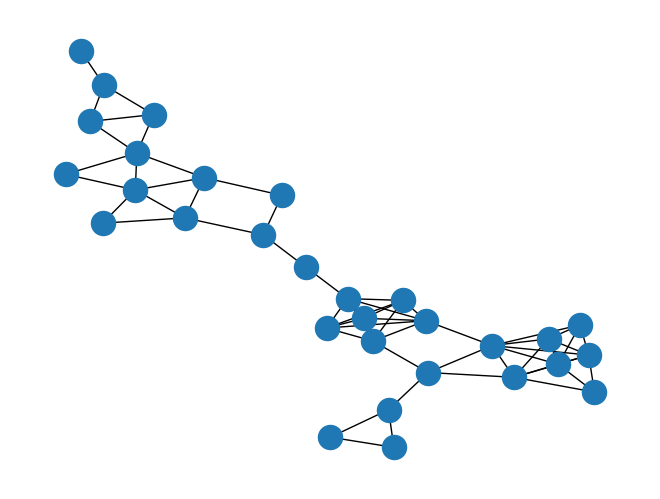

In [2]:
# create some test graph. Feel free to change this to whatever graph you want to visualize and use.
# number of nodes
number_of_nodes = 30
# density
radius = 0.25

graph = nx.random_geometric_graph(number_of_nodes, radius, seed=11)

nx.draw_kamada_kawai(graph)

In [12]:
# Choose a penalty factor \alpha and create a MIS problem instance for QIRO
alpha = 1.1
seed = 420
mis_problem = MIS(graph=graph, alpha=alpha, seed=seed) 
# create the matrices required for computation:
mis_problem.graph_to_matrix()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [4]:
# we define the object that is used for calculating expectation values of the Z, ZZ operators
# as given by p=1 QAOA.
# Different methods of computing these will be added in the future.
mis_expval = SingleLayerQAOAExpectationValues(mis_problem)

In [5]:
# problem size that we brute-force:
n_c = 3
# instantiate a QIRO object:
qmis = QIRO_MIS(nc_input=n_c, expectation_values_input=mis_expval)

qmis.execute()

Step: 1. Number of nodes: 30.


/Users/nicostabla/PycharmProjects/qiro/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/nicostabla/PycharmProjects/qiro/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


single var [10]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[10]]. Moving on.
Step: 2. Number of nodes: 29.
single var [30]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[30]]. Moving on.
Step: 3. Number of nodes: 28.
single var [16]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[16]]. Moving on.
Step: 4. Number of nodes: 27.
single var [27]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[27]]. Moving on.
Step: 5. Number of nodes: 26.
single var [6]. Sign: -1
Pruned 0 variables.
We have fixed the following variables: [[6]]. Moving on.
Step: 6. Number of nodes: 25.
Correlation [12, 8]. Sign: -1.
Pruned 0 variables.
No variables could be fixed.
Attempting with the 1. largest correlation.
Correlation [29, 7]. Sign: -1.
Pruned 0 variables.
No variables could be fixed.
Attempting with the 2. largest correlation.
Correlation [13, 26]. Sign: -1.
Pruned 0 variables.
No variables could be fixed.
Att

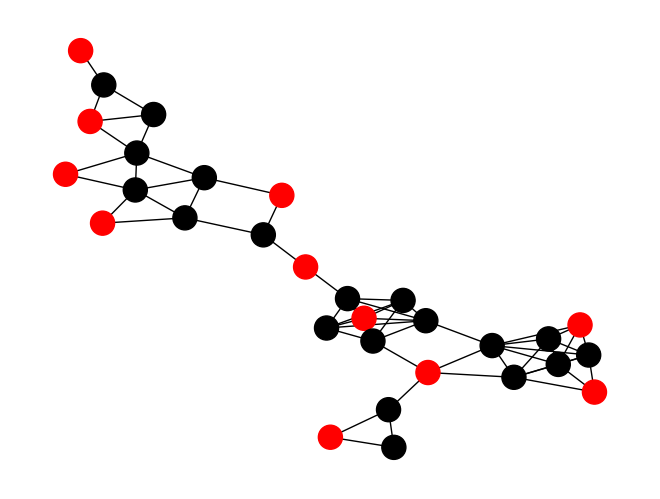

In [6]:
# visualize the solution:
nx.draw_kamada_kawai(graph, node_color=[("k", "r")[int(x > 0)] for x in qmis.solution])


## Knapsack

In [18]:
from problem_generation import Generate_Knapsack as GK

maxWeight = 40
weights = [20, 20, 20, 30, 45, 55, 40, 7, 8, 90]
values = [30, 30, 30 , 400, 50, 6, 70 ,8, 9, 100]
seed = 42
A = 101
B = 1

knapsack = GK.Knapsack(maxWeight, weights, values, seed, A, B)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [19]:
knapsack.matrix

array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,   40370.,       0., ...,       0.,       0.,       0.],
       [      0.,  161600.,   40370., ...,       0.,       0.,       0.],
       ...,
       [      0., -153520., -153520., ...,  145844.,       0.,       0.],
       [      0., -157560., -157560., ...,  299768.,  153621.,       0.],
       [      0., -161600., -161600., ...,  307444.,  315524.,  161600.]])

In [ ]:
# does position translater relate to items? Then, it must be smaller [len(weights)] => 8 in this case
# or does it relate to the total number of variables, then the current implementation would be correct 

## MAX2SAT

In [15]:
from problem_generation import Generate_M2S as GM2S
m2s = GM2S.MAX2SAT(3, 10, 42)

[0, 1, 2, 3]
